In [1]:
import numpy as np 
import pandas as pd
from scipy import fft
from scipy.fft import fft, fftfreq
from scipy.signal import welch
import matplotlib.pyplot as plt 
from scipy.signal import periodogram
from matplotlib.ticker import FuncFormatter 
from matplotlib.ticker import MultipleLocator
FuncFormatter

matplotlib.ticker.FuncFormatter

In [2]:
# Membaca data
df = pd.read_excel('QBO Data.xlsx')

# Menampilkan DataFrame
print(df)

     30 hPa  25 hPa  20 hPa     Date
0      -260    -289    -326  1011987
1      -266    -280    -307  1021987
2      -271    -309    -311  1031987
3      -270    -303    -328  1041987
4      -268    -289    -295  1051987
..      ...     ...     ...      ...
414    -238    -297    -316  1072021
415    -233    -319    -330  1082021
416    -268    -332    -359  1092021
417    -283    -339    -368  1102021
418    -279    -320    -351  1112021

[419 rows x 4 columns]


In [3]:
# Membaca data
df2 = pd.read_excel('Total Column Ozone.xlsx')

# Menampilkan DataFrame
print(df2)

# Ambil nilai ozon sebagai array
ozon = df2['TCO'].values

        Date      TCO
0    1011987  0.00515
1    1021987  0.00502
2    1031987  0.00513
3    1041987  0.00518
4    1051987  0.00520
..       ...      ...
415  1082021  0.00558
416  1092021  0.00564
417  1102021  0.00563
418  1112021  0.00552
419  1122021  0.00551

[420 rows x 2 columns]


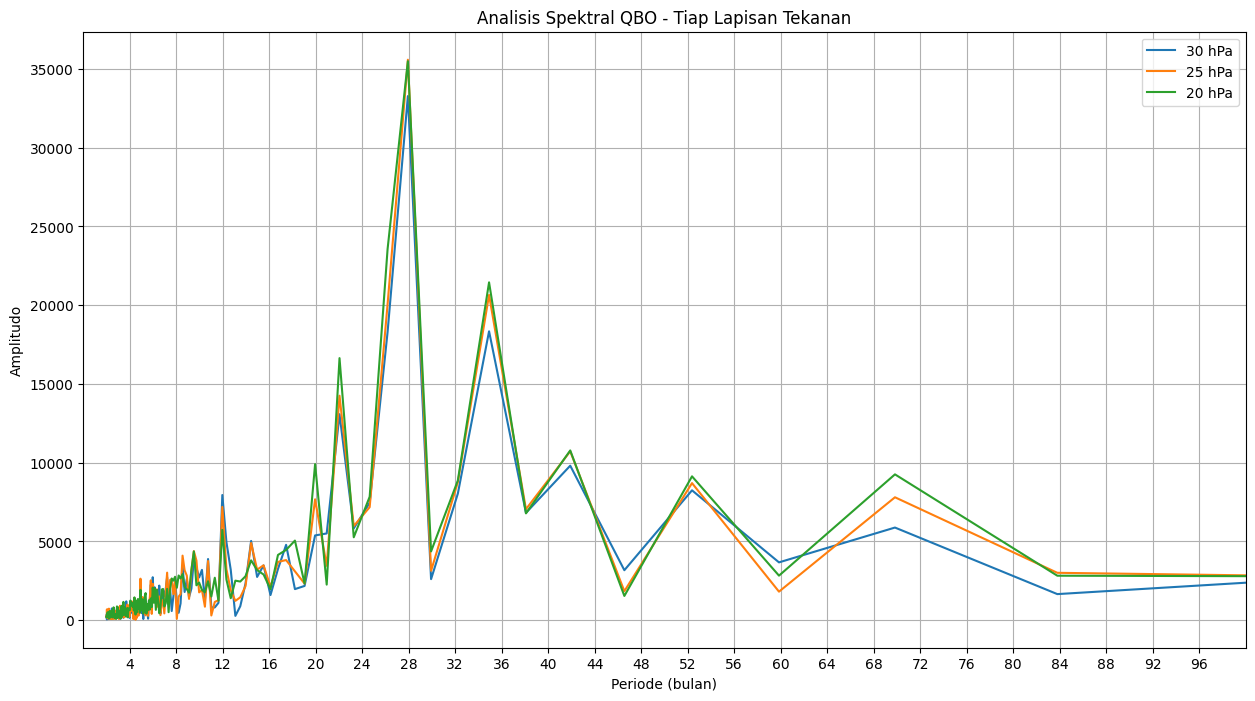


Lapisan dengan komponen spektral paling dominan:
  Lapisan  Amplitudo Dominan  Periode Dominan (bulan)
1  25 hPa       35579.120256                27.933333
2  20 hPa       35484.010117                27.933333
0  30 hPa       33269.928363                27.933333


In [4]:
# 1. Load data
file_path = "QBO Data.xlsx"
df = pd.read_excel(file_path)

# Pastikan kolom 'Date' jadi index waktu
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop kolom Year dan Month jika masih ada
df = df.drop(columns=['Year', 'Month'], errors='ignore')

# 2. Lakukan FFT pada masing-masing lapisan tekanan
plt.figure(figsize=(15, 8))
dominant_amplitudes = {}
dominant_periods = {}

for column in df.columns:
    signal = df[column].dropna()
    n = len(signal)
    timestep = 1  # diasumsikan data bulanan
    freq = fftfreq(n, d=timestep)
    fft_values = fft(signal)
    
    # Ambil hanya frekuensi positif
    positive_freqs = freq[:n // 2]
    magnitude = np.abs(fft_values[:n // 2])

    # Simpan data spektrum dominan
    max_index = np.argmax(magnitude[1:]) + 1  # skip frekuensi 0
    dominant_freq = positive_freqs[max_index]
    dominant_period = 1 / dominant_freq if dominant_freq != 0 else np.nan
    dominant_amplitudes[column] = magnitude[max_index]
    dominant_periods[column] = dominant_period

    # Plot spektrum
    plt.plot(1 / positive_freqs[1:], magnitude[1:], label=f"{column}")

# Menyesuaikan sumbu periode ke kelipatan 4
plt.xticks(np.arange(4, 100, 4))

plt.xlabel("Periode (bulan)")
plt.ylabel("Amplitudo")
plt.title("Analisis Spektral QBO - Tiap Lapisan Tekanan")
plt.legend()
plt.grid(True)
plt.xlim(0, 100)
plt.show()

# 3. Ringkasan hasil dominan
dominant_df = pd.DataFrame({
    "Lapisan": dominant_amplitudes.keys(),
    "Amplitudo Dominan": dominant_amplitudes.values(),
    "Periode Dominan (bulan)": dominant_periods.values()
}).sort_values(by="Amplitudo Dominan", ascending=False)

print("\nLapisan dengan komponen spektral paling dominan:")
print(dominant_df)

Energi Tertinggi (PSD Maks): 2.3398689328124297e-06
Frekuensi Dominan: 0.002380952380952381 siklus/bulan
Periode Dominan: 420.00 bulan


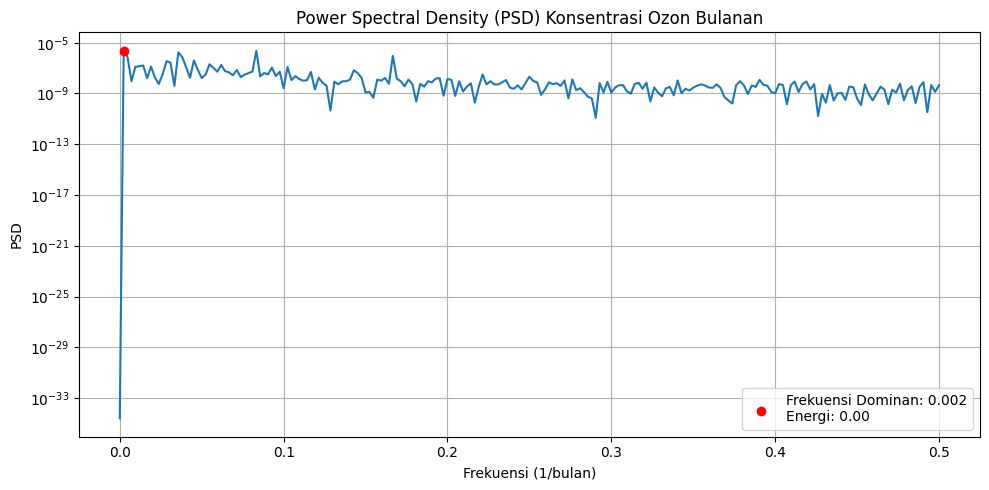

In [11]:
fs = 1  # Sampling 1 per bulan
freqs, psd = periodogram(ozon, fs=fs)

# Temukan energi tertinggi dan frekuensi dominan
idx_max = np.argmax(psd)
energi_tertinggi = psd[idx_max]
frekuensi_dominan = freqs[idx_max]

# Tampilkan hasil
print(f"Energi Tertinggi (PSD Maks): {energi_tertinggi}")
print(f"Frekuensi Dominan: {frekuensi_dominan} siklus/bulan")
if frekuensi_dominan != 0:
    print(f"Periode Dominan: {1/frekuensi_dominan:.2f} bulan")
else:
    print("Periode Dominan: Tak hingga (komponen DC)")

# Visualisasi PSD dan frekuensi dominan
plt.figure(figsize=(10, 5))
plt.semilogy(freqs, psd)
plt.scatter(
    frekuensi_dominan, energi_tertinggi,
    color='red', zorder=5,
    label=f'Frekuensi Dominan: {frekuensi_dominan:.3f}\nEnergi: {energi_tertinggi:.2f}'
)
plt.title('Power Spectral Density (PSD) Konsentrasi Ozon Bulanan')
plt.xlabel('Frekuensi (1/bulan)')
plt.ylabel('PSD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()